In [2]:
print("testing")

testing


In [3]:
import pandas as pd
import numpy as np
import os
import shutil
import glob

# Load the summary and metadata CSV files
try:
    summary_df = pd.read_csv('Chest_xray_Corona_dataset_Summary.csv')
    metadata_df = pd.read_csv('Chest_Xray_Corona_Metadata.csv')

    print("Successfully loaded the CSV files.")
    print("\nDataset Summary:")
    print(summary_df.head())
    print("\nDataset Metadata:")
    print(metadata_df.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please make sure the CSV files are in the same directory as your notebook.")

Successfully loaded the CSV files.

Dataset Summary:
   Unnamed: 0     Label Label_1_Virus_category Label_2_Virus_category  \
0           0    Normal                    NaN                    NaN   
1           1  Pnemonia         Stress-Smoking                   ARDS   
2           2  Pnemonia                  Virus                    NaN   
3           3  Pnemonia                  Virus               COVID-19   
4           4  Pnemonia                  Virus                   SARS   

   Image_Count  
0         1576  
1            2  
2         1493  
3           58  
4            4  

Dataset Metadata:
   Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN              

In [4]:
# Data Cleaning and Preprocessing
metadata_df['Label'] = metadata_df['Label'].replace({'Pnemonia': 'Pneumonia'})

train_images = glob.glob('Coronahack-Chest-Xray-Dataset/train/*')
test_images = glob.glob('Coronahack-Chest-Xray-Dataset/test/*')

# Combine them into a single list
all_images = train_images + test_images
image_path_dict = {os.path.basename(p): p for p in all_images}

# Create the 'ImagePath' column by mapping the 'X_ray_image_name' to our dictionary.
metadata_df['ImagePath'] = metadata_df['X_ray_image_name'].map(image_path_dict)

# Now, let's look at our cleaned and updated metadata.
print("Cleaned and updated metadata:")
print(metadata_df.head())

# We can also check if there are any missing image paths.
print(f"\nNumber of missing image paths: {metadata_df['ImagePath'].isnull().sum()}")

# Let's inspect the distribution of our labels
print("\nLabel distribution:")
print(metadata_df['Label'].value_counts())

Cleaned and updated metadata:
   Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category                                          ImagePath  
0                    NaN  Coronahack-Chest-Xray-Dataset/train\IM-0128-00...  
1                    NaN  Coronahack-Chest-Xray-Dataset/train\IM-0127-00...  
2                    NaN  Coronahack-Chest-Xray-Dataset/train\IM-0125-00...  
3                    NaN  Coronahack-Chest-Xray-Dataset/train\IM-0122-00...  
4                    NaN  Coronahack-Chest-Xray-Dataset/train\IM-0119-00...  

Number of missing im

In [5]:
!pip install opencv-python


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\nares\AppData\Local\Temp\ipykernel_15384\1487822292.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=metadata_df, palette='pastel')


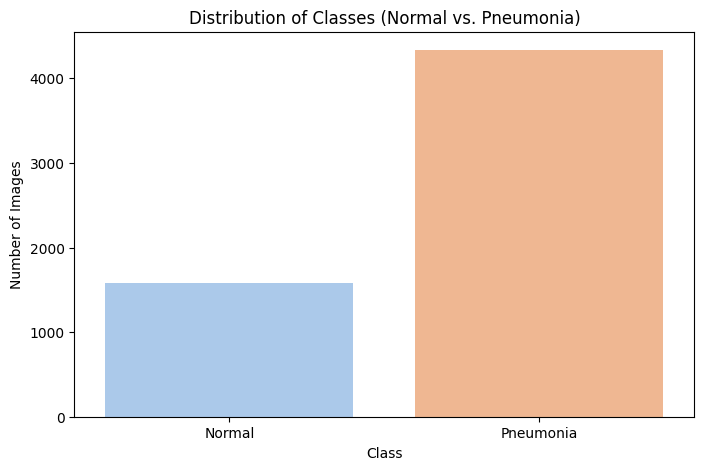

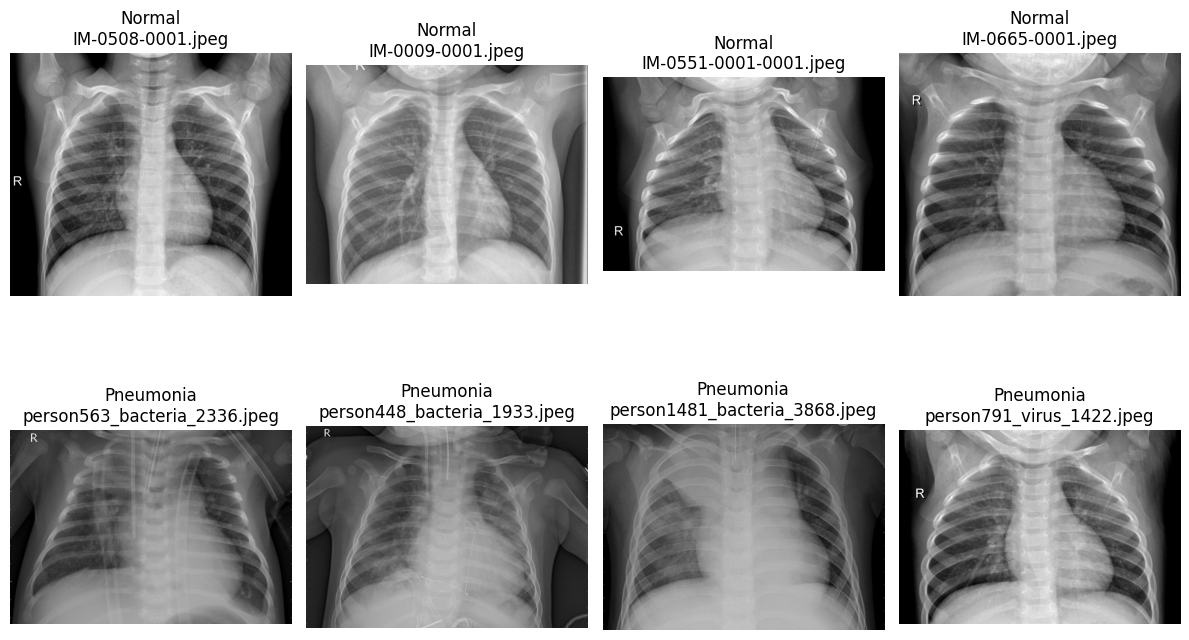

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random

# 1. Visualize the distribution of labels
plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=metadata_df, palette='pastel')
plt.title('Distribution of Classes (Normal vs. Pneumonia)')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# 2. Display some sample images
def show_sample_images(df, num_samples=4):
    # Separate the dataframe by label
    normal_df = df[df['Label'] == 'Normal'].sample(num_samples)
    pneumonia_df = df[df['Label'] == 'Pneumonia'].sample(num_samples)

    plt.figure(figsize=(12, 8))
    
    # Show Normal images
    for i, row in enumerate(normal_df.itertuples()):
        plt.subplot(2, num_samples, i + 1)
        img = cv2.imread(row.ImagePath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Normal\n{os.path.basename(row.ImagePath)}')
        plt.axis('off')

    # Show Pneumonia images
    for i, row in enumerate(pneumonia_df.itertuples()):
        plt.subplot(2, num_samples, i + 1 + num_samples)
        img = cv2.imread(row.ImagePath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Pneumonia\n{os.path.basename(row.ImagePath)}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display 4 samples from each class
show_sample_images(metadata_df, num_samples=4)

In [7]:
import shutil

# --- Create the new directory structure ---
base_dir = 'dataset'

# It's good practice to remove the directory if it already exists to start fresh
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

# Create the base directory
os.makedirs(base_dir, exist_ok=True)

# Create train and test directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create class subdirectories within train and test directories
# For 'Normal'
train_normal_dir = os.path.join(train_dir, 'Normal')
test_normal_dir = os.path.join(test_dir, 'Normal')
os.makedirs(train_normal_dir, exist_ok=True)
os.makedirs(test_normal_dir, exist_ok=True)

# For 'Pneumonia'
train_pneumonia_dir = os.path.join(train_dir, 'Pneumonia')
test_pneumonia_dir = os.path.join(test_dir, 'Pneumonia')
os.makedirs(train_pneumonia_dir, exist_ok=True)
os.makedirs(test_pneumonia_dir, exist_ok=True)

print("Directory structure created successfully.")

# --- Copy images to the new directories ---
print("Copying images...")

for index, row in metadata_df.iterrows():
    # Source path of the image
    source_path = row['ImagePath']
    
    # Skip if the image path is missing for any reason
    if pd.isna(source_path):
        continue

    # Determine the destination folder
    if row['Dataset_type'] == 'TRAIN':
        if row['Label'] == 'Normal':
            dest_path = os.path.join(train_normal_dir, row['X_ray_image_name'])
        else: # Pneumonia
            dest_path = os.path.join(train_pneumonia_dir, row['X_ray_image_name'])
    else: # TEST
        if row['Label'] == 'Normal':
            dest_path = os.path.join(test_normal_dir, row['X_ray_image_name'])
        else: # Pneumonia
            dest_path = os.path.join(test_pneumonia_dir, row['X_ray_image_name'])
            
    # Copy the file
    shutil.copy(source_path, dest_path)

print("Image copying complete.")

# --- Verification Step ---
print("\nVerifying the number of images in each directory:")
print(f"Total training Normal images: {len(os.listdir(train_normal_dir))}")
print(f"Total training Pneumonia images: {len(os.listdir(train_pneumonia_dir))}")
print(f"Total testing Normal images: {len(os.listdir(test_normal_dir))}")
print(f"Total testing Pneumonia images: {len(os.listdir(test_pneumonia_dir))}")

Directory structure created successfully.
Copying images...
Image copying complete.

Verifying the number of images in each directory:
Total training Normal images: 1342
Total training Pneumonia images: 3944
Total testing Normal images: 234
Total testing Pneumonia images: 390


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# --- 1. Create Image Data Generators ---

# Define image dimensions and batch size
IMG_WIDTH, IMG_HEIGHT = 150, 150
BATCH_SIZE = 32

# Create a generator for the training data with data augmentation
# Data augmentation creates new training samples from the existing ones by applying
# random transformations (like rotation, zoom), which helps the model generalize better.
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Rescale pixel values from [0, 255] to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for the test data (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # For binary classification (Normal/Pneumonia)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False # Important for evaluation
)

# --- 2. Build the CNN Model ---
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the results to feed into a dense layer
    Flatten(),

    # Dense layer with dropout for regularization
    Dense(512, activation='relu'),
    Dropout(0.5), # Dropout helps prevent overfitting

    # Output layer
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# --- 3. Compile the Model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


# --- 4. Train the Model ---
print("\nStarting model training...")
# Note: We are using test_generator as validation_data for simplicity.
# In a more advanced setup, you might create a separate validation set.
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,  # We'll start with 10 epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)
print("Model training complete.")

Found 5286 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


d:\ANconda\envs\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...


d:\ANconda\envs\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 144s 863ms/step - accuracy: 0.7522 - loss: 0.5519 - val_accuracy: 0.6414 - val_loss: 0.8387
Epoch 2/10
  1/165 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - accuracy: 0.9062 - loss: 0.2332

d:\ANconda\envs\env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9062 - loss: 0.2332 - val_accuracy: 0.6299 - val_loss: 0.9844
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 71s 432ms/step - accuracy: 0.8423 - loss: 0.3466 - val_accuracy: 0.8635 - val_loss: 0.3318
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8438 - loss: 0.3239 - val_accuracy: 0.8043 - val_loss: 0.4008
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 71s 428ms/step - accuracy: 0.8787 - loss: 0.2764 - val_accuracy: 0.8750 - val_loss: 0.3253
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8750 - loss: 0.2558 - val_accuracy: 0.8717 - val_loss: 0.3333
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 68s 413ms/step - accuracy: 0.8755 - loss: 0.2748 - val_accuracy: 0.7566 - val_loss: 0.6002
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7812 - loss: 0.4493 - val_accuracy: 0.7615 - val_loss: 0.5664
Epoch 9/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 69s 416ms/step - accuracy: 0.8850 - loss: 0.2586 - val_accurac

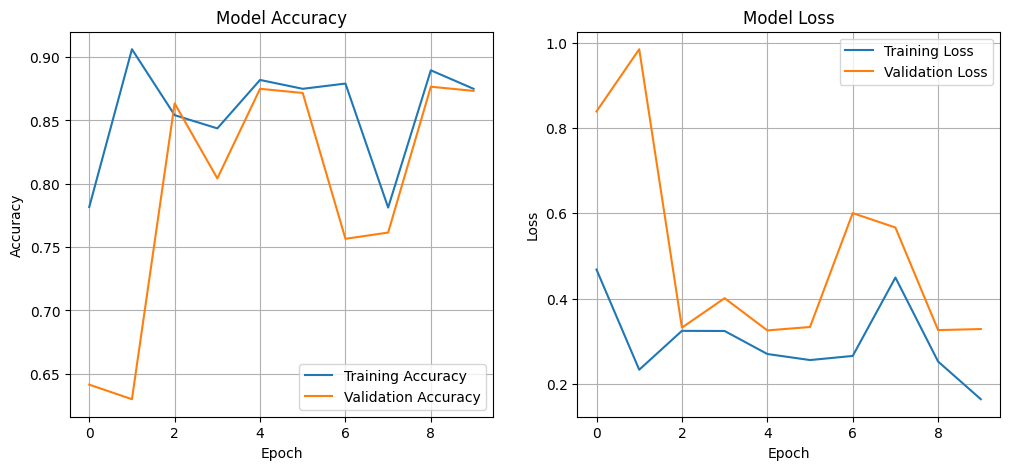


Evaluating model on the test set...
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8227 - loss: 0.4813
Test Accuracy: 87.34%
Test Loss: 0.3245
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step

Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.74      0.81       234
   Pneumonia       0.86      0.95      0.90       390

    accuracy                           0.87       624
   macro avg       0.88      0.85      0.86       624
weighted avg       0.88      0.87      0.87       624



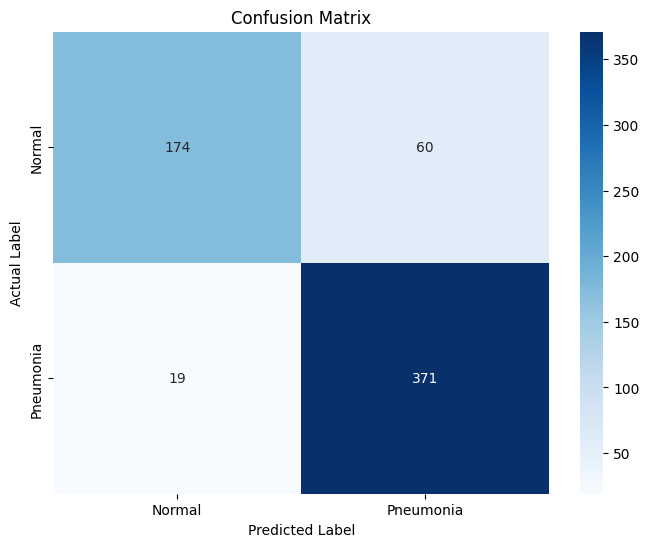

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- 1. Plot Training History ---
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# --- 2. Final Evaluation on Test Set ---
print("\nEvaluating model on the test set...")
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


# --- 3. Confusion Matrix and Classification Report ---
# Get the true labels
y_true = test_generator.classes

# Get the predicted probabilities
y_pred_probs = model.predict(test_generator)

# Convert probabilities to binary class predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show() 

Testing image: dataset\test\Normal\IM-0001-0001.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


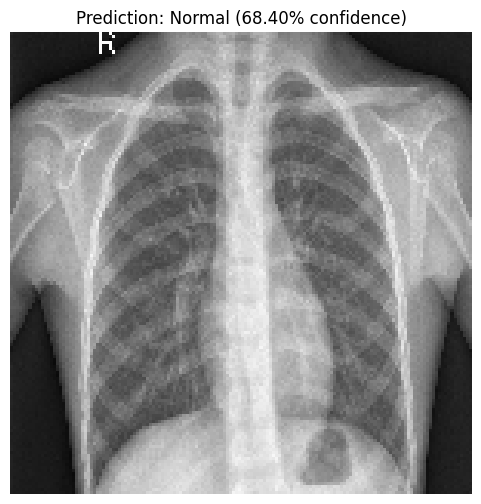

Testing image: dataset\test\Pneumonia\person100_bacteria_475.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


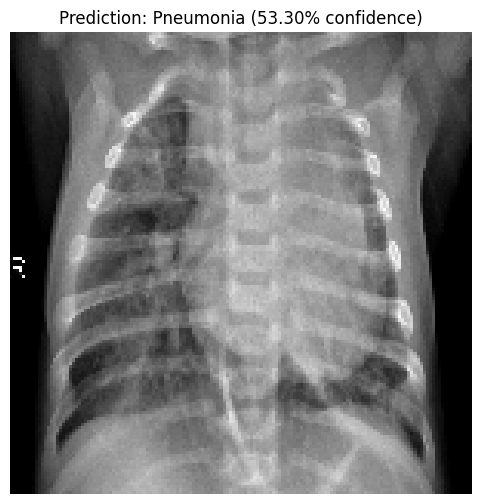

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def predict_single_image(image_path, model):
    """
    Loads an image, preprocesses it, and predicts its class using the trained model.
    """
    # --- 1. Load and Preprocess the Image ---
    try:
        # Load the image, resizing it to the size our model expects
        img = image.load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
        
        # Convert the image to a numpy array
        img_array = image.img_to_array(img)
        
        # Add a fourth dimension (for the batch size)
        img_array = np.expand_dims(img_array, axis=0)
        
        # Rescale the pixel values to be between 0 and 1
        img_array = img_array / 255.0
        
    except FileNotFoundError:
        print(f"Error: The file was not found at {image_path}")
        return

    # --- 2. Make a Prediction ---
    prediction = model.predict(img_array)
    
    # --- 3. Display the Results ---
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis('off')

    # The model outputs a probability. We'll set a threshold of 0.5.
    if prediction[0][0] > 0.5:
        confidence = prediction[0][0] * 100
        plt.title(f"Prediction: Pneumonia ({confidence:.2f}% confidence)")
    else:
        confidence = (1 - prediction[0][0]) * 100
        plt.title(f"Prediction: Normal ({confidence:.2f}% confidence)")
    
    plt.show()


# --- Let's test it! ---
# You can change the path to any image you want to test.

# Example 1: Test a 'Normal' image from the test set
normal_image_path = os.path.join(test_normal_dir, os.listdir(test_normal_dir)[0])
print(f"Testing image: {normal_image_path}")
predict_single_image(normal_image_path, model)

# Example 2: Test a 'Pneumonia' image from the test set
pneumonia_image_path = os.path.join(test_pneumonia_dir, os.listdir(test_pneumonia_dir)[0])
print(f"Testing image: {pneumonia_image_path}")
predict_single_image(pneumonia_image_path, model)

Testing a 'Normal' image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


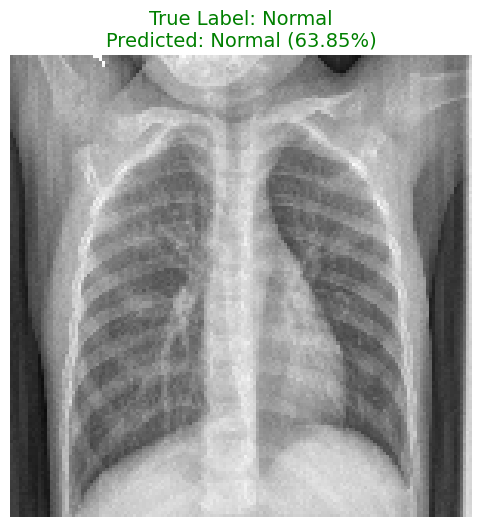

Testing a 'Pneumonia' image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


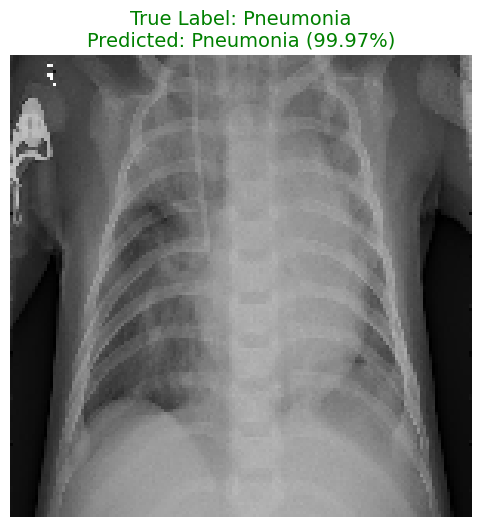

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def predict_and_compare(image_path, true_label, model):
    """
    Loads an image, predicts its class, and compares the prediction
    to the actual (true) label.
    """
    # --- 1. Load and Preprocess the Image ---
    try:
        img = image.load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
    except FileNotFoundError:
        print(f"Error: The file was not found at {image_path}")
        return

    # --- 2. Make a Prediction ---
    prediction = model.predict(img_array)
    
    # --- 3. Determine the Predicted Label ---
    if prediction[0][0] > 0.5:
        predicted_label = "Pneumonia"
        confidence = prediction[0][0] * 100
    else:
        predicted_label = "Normal"
        confidence = (1 - prediction[0][0]) * 100
        
    # --- 4. Display the Results with Comparison ---
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    
    # Set the title text and color based on correctness
    title_text = f"True Label: {true_label}\nPredicted: {predicted_label} ({confidence:.2f}%)"
    
    if predicted_label == true_label:
        title_color = 'green'
    else:
        title_color = 'red'
        
    plt.title(title_text, color=title_color, fontsize=14)
    plt.show()


# --- Let's test it! ---

# Example 1: Test a 'Normal' image
# We know the true label is "Normal"
normal_image_path = os.path.join(test_normal_dir, os.listdir(test_normal_dir)[5]) # using 6th image
print(f"Testing a 'Normal' image...")
predict_and_compare(image_path=normal_image_path, true_label="Normal", model=model)


# Example 2: Test a 'Pneumonia' image
# We know the true label is "Pneumonia"
pneumonia_image_path = os.path.join(test_pneumonia_dir, os.listdir(test_pneumonia_dir)[5]) # using 6th image
print(f"Testing a 'Pneumonia' image...")
predict_and_compare(image_path=pneumonia_image_path, true_label="Pneumonia", model=model)

In [14]:
# In your Jupyter Notebook
model.save('chest_xray_model.h5', include_optimizer=False)

print("Model successfully saved in a more compatible format.")

Model successfully saved in a more compatible format.
